# Genetic Algorithm for Real - Values

In [3]:
import numpy as np
import random 
import math
from operator import itemgetter
from numpy import linspace
import matplotlib.pyplot as plt

In [30]:
"""
This algorithm takes the number of initial chromosomes and also the range in which the values should be present 
"""

def Initializtion(N, no_of_var , start, end, method, function = "Default"):
    # Enter Trignometric in function parameter to get trignometric initialization
    population = []
    function_values = []
    for count in range(N):
        value = []
        if function == "Default":
            for each in range(no_of_var):
                value.append(random.randrange(start, end))
            population.append(value)
        else:
            for each in range(no_of_var):
                value.append(math.pi * random.randrange(start, end))
            population.append(value)
        function_values.append(method(value))
    return population, function_values

def Selection(N, population, method, arrangement):
    population1 = population
    new_list = []
    for each in range(N):
        rand1 = random.random()*np.shape(population1)[0]
        rand2 = random.random()*np.shape(population1)[0]
        index1 = int(rand1 - rand1%1)
        index2 = int(rand2 - rand2%1)
        if arrangement.lower() == "max":
            if method(population1[index1])>= method(population1[index2]):
                new_list.append(population1[index1])
                np.delete(population1, index1)
            else:
                new_list.append(population1[index2])
                np.delete(population1, index2)
        elif arrangement.lower() == "min":
            if method(population1[index1])<= method(population1[index2]):
                new_list.append(population1[index1])
                np.delete(population1, index1)
            else:
                new_list.append(population1[index2])
                np.delete(population1, index1)
        else:
            print("You have entered a wrong value for arrangement")
            exit()
    return new_list
    
def Crossover(p, population1, distribution_index = 20):
    pop = list(population1)
    for each in range(int(p*np.shape(pop)[0])):
        rand1 = random.random()*np.shape(pop)[0]
        rand2 = random.random()*np.shape(pop)[0]
        parent1 = np.asarray(pop[int(rand1 - rand1%1)],dtype=float)
        parent2 = np.asarray(pop[int(rand2 - rand2%1)],dtype=float)
        rand3 = random.random()
        if rand3 <= 0.5:
            b = (2*rand3)**(1/(1+distribution_index))
        else:
            b = ((1/2)*(1-rand3))**(1/(1+distribution_index))
        child1 = (1/2)*((1+b)*parent1+(1-b)*parent2)
        child2 = (1/2)*((1-b)*parent1+(1+b)*parent2)
        pop.append(child1)
        pop.append(child2)
    return pop

def Mutation(mutation_probability, pops, distribution_index = 20):
    popu = list(pops)
    for each in range(int(mutation_probability*np.shape(pops)[0])):
        rand1 = int(random.random()*np.shape(popu)[0])
        rand2 = random.random()
        if rand2 <= 0.5:
            d = (2*rand2)**(1/(1+distribution_index)) - 1
        else:
            d = 1 - (2*(1-rand2))**(1/(distribution_index + 1))
        mutant = np.add(popu[rand1], d)
        popu.append(mutant)
        return popu
def Next_Gen(population, function, arrangement, actual):
    output = []
    i = 0
    for each in population:
        output.append(function(population[i]))
        i = i + 1
    #print(population)
    pops = list(population)
    #print(np.shape(pops), np.shape(output))
    pops2 = np.column_stack((np.array(pops),np.array(output))) 
    #print(np.shape(pops2))
    ind = np.argsort(pops2[:,-1]);
    #print(pops2)
    sorted_list = pops2[ind]
    #print(sorted_list)
    if arrangement.lower() == "min":
        return sorted_list[:actual, :-1]
    elif arrangement.lower() == "max":
        return sorted_list[-actual:, :-1]

In [31]:
def method(X):
    return np.sum(np.array(X)**2)
best = []
output = []
i, function_value = Initializtion(100 ,100 , 2, 100, method)
for each in range(100):
    selected = Selection(100, i, method, "min")
    crossover = Crossover(0.8, selected, 20)
    mutated = Mutation(0.2, crossover, 20)
    i = Next_Gen(mutated, method, "min", 100)
    best.append(i)
    output.append(method(i))

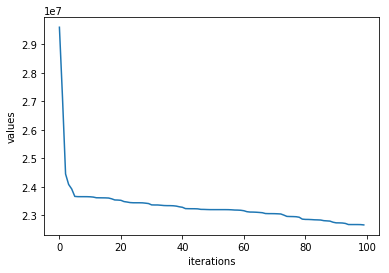

In [32]:
plt.plot(output )
plt.ylabel('values')
plt.xlabel('iterations')
plt.show()